In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pwd

'F:\\MLP\\Time_Series'

In [109]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [110]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [111]:
from datetime import datetime

convert = data['Month']
data['Month'] =  pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [112]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [113]:
series = data['#Passengers']
series.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [114]:
series['1949-01-01']

112

In [115]:
series[datetime(1949,1,1)]

112

In [116]:
series['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [117]:
series[:'1949-06-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
Name: #Passengers, dtype: int64

In [118]:
series['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

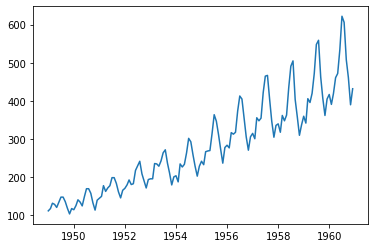

In [119]:
plt.plot(series)

Plotting Rolling Statistics :The function will plot the moving mean or moving Standard Deviation. This is still visual method
    
    NOTE: moving mean and moving standard deviation — At any instant ‘t’, we take the mean/std of the last year which in this case is 12 months)
        
        Dickey-fuller Test :This is one of the statistical tests for checking stationarity. First we consider the null hypothesis: the time series is non- stationary. The result from the rest will contain the test statistic and critical value for different confidence levels. The idea is to have Test statistics less than critical value, in this case we can reject the null hypothesis and say that this Time series is indeed stationary (the force is strong with this one !!)

In [120]:
from statsmodels.tsa.stattools import adfuller

def stationary_test(timeseries):
    # Determining rolling statistics
    rolmean = pd.DataFrame.rolling(timeseries, window=12).mean()
    rolstd = pd.DataFrame.rolling(timeseries, window=12).std()
    
    #plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    # Perform Dickey-Fuller test
    print('Results of DF test : ')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s) '%key] = value
    print(dfoutput)
    

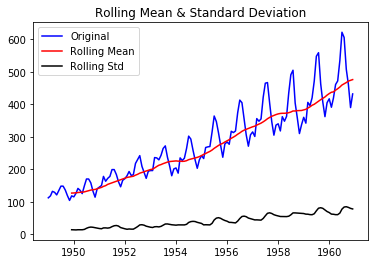

Results of DF test : 
Test Statistic                   0.815369
p-value                          0.991880
Lags Used                       13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [121]:
# Let's parse our time series data

stationary_test(series)

In [122]:
# The Above series is not stationary because:
    # Mean is increasing even though the std is small
    # Test stat is > critical value
    # Note : The signed values are compared and the absolute values

In [123]:
# Making the Time Series Stationary

# Two major factors that make a time series non-stationary : 
    # Trend: Non-constant mean
    # Seasonality: Variation at specific time-frames

In [124]:
# The basic idea is to model the trend and seasonality in this
# series, so we can remove it and make the series stationary.
# Then we can go ahead and apply statistical forecasting to 
# the stationary series. And finally we can convert the 
# forecasted values into original by applying the trend 
# and seasonality constrains back to those that we 
# previously separated.

### Trend

In [125]:
# The first step is to reduce the trend using transformatio, as we can see here
# that there is a strong positive trend. These transformation can
# be log, sqrt, cube root etc. Basically it penalizes larger 
# values more than the smaller. In this case we will use
# log transformation.

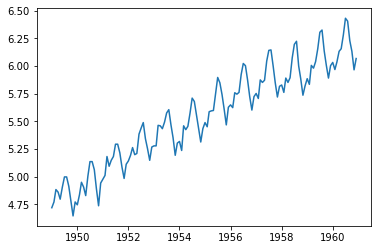

In [126]:
series_log = np.log(series)
plt.plot(series_log)

In [127]:
# There is some noise in realizing the forward trend here. There
# are some methods to model these trends and then remove them 
# from the series. Some of the common ones are:

    # Smoothing : using rolling/moving average
    # Aggression : By taking the mean for a certain time period
        #(year/month)
        
        
# We will use Smoothing:      

In [128]:
# In Smoothing we usually take the past few 
# instances(rolling estimates). We will discusss two methods 
# under smoothing - Moving Average and 
# Exponentially weighted moving average.

#### Moving Average

In [129]:
# First take x consecutive values and this depende on the frequency
# if it is 1 year we take 12 values. Pandas has a function 
# for rolling estimate.

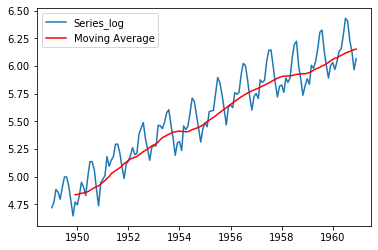

In [130]:
moving_avg = pd.DataFrame.rolling(series_log, 12).mean()
plt.plot(series_log, label='Series_log')
plt.plot(moving_avg, color='red', label='Moving Average')
plt.legend()

In [131]:
# Subtract the rollingmean from the original series

series_log_moving_avd_diff = series_log - moving_avg
series_log_moving_avd_diff.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: #Passengers, dtype: float64

In [132]:
# The reason for null values is because we take the aerage of 
# first 12 so 11 values are null.
# So for further analysis we dropped the null values

In [133]:
series_log_moving_avd_diff.dropna(inplace=True)
series_log_moving_avd_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

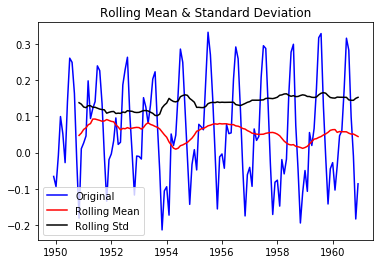

Results of DF test : 
Test Statistic                  -3.162908
p-value                          0.022235
Lags Used                       13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [134]:
stationary_test(series_log_moving_avd_diff)

#### Findings : 

In [135]:
# The rolling values are varying
    # slightly but there is no specific trend
# The test statistics is smaller thatnt eh 5% critical values. 
    #That tells that we are 95% confident that 
    #the series is stationary.

In [136]:
# In this example we can easily take a time period(12 months for a 
    # year), there are situations where  the time period range
    # is more complex like stock price etc. So we use the
    # exponentially weighted moving average.
    
# The previous values are assigned with a decay factor.

In [137]:
print(pd.__version__)

0.25.1


NotImplementedError: See issue #11704 https://github.com/pandas-dev/pandas/issues/11704

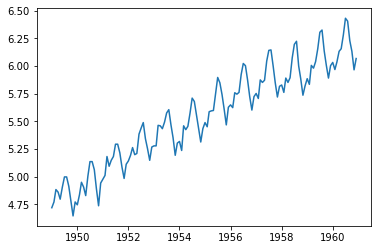

In [60]:
df = pd.DataFrame(series_log)
expweighted_avg = df.ewm(com=0.5)
#pd.DataFrame.ewm(series_log, halflife=12)
plt.plot(series_log, label='Series_log')
plt.plot(expweighted_avg, color='red', label='Expweighted Average')

### Seasonality (Along with Trend)

In [138]:
# We will see both trend and seasonality.
# Most Time Series have trends along with seasonality.
# Two common methods to remove trend and seasonality.
    # Differencing: by taking difference using time lag
    # Decomposition: model both trend and seasonality,
    #then remove them,

#### Differencing

In [139]:
# First take the difference of the value as a 
# particular time with that od the precious time.

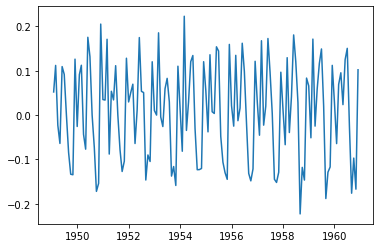

In [140]:
series_log_diff = series_log - series_log.shift()
plt.plot(series_log_diff)

In [141]:
series_log_diff.head(10)

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
1949-09-01   -0.084557
1949-10-01   -0.133531
Name: #Passengers, dtype: float64

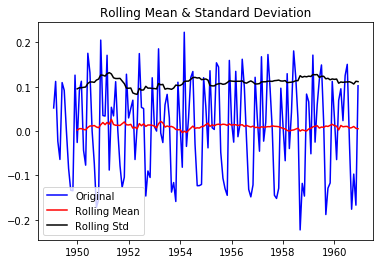

Results of DF test : 
Test Statistic                  -2.717131
p-value                          0.071121
Lags Used                       14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [142]:
# Lets pass it to the stationary test function

series_log_diff.dropna(inplace=True)
stationary_test(series_log_diff)

#### Decomposing

In [143]:
# Here we model both the trend and the seasonality, 
# then the remaning past of the time series is returned.

In [149]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(series_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

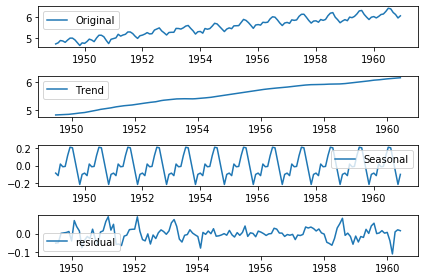

In [150]:
plt.subplot(411)
plt.plot(series_log, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()


In [148]:
# Remove the trend and seasonality from the Time Series
# and we can use the residual values

In [152]:
series_log_decompose = residual
series_log_decompose.dropna(inplace=True)

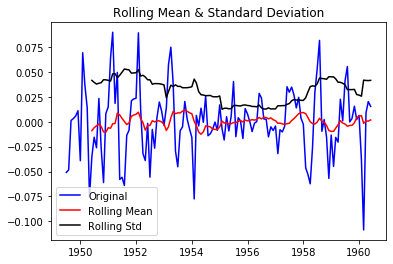

Results of DF test : 
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
Lags Used                      9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [153]:
stationary_test(series_log_decompose)

In [154]:
# Findings : 
    # Test Statistic is smaller the 1% of the Critical Value

### Forcasting

In [155]:
# Now the Time Series is stationary, let's make models on the time 
# series using differencing because it is easy to add the error, 
# trend and seasonality back into predicted values.

In [156]:
# We will use statistical Modelling method called ARIMA to 
# forecast the data where there are dependencies in the values.

In [157]:
# Auto Regressive Integrated Moving Average(ARIMA) - 
# It is like a linear regression equation where 
# the predictors depend on parameters(p,d,q) of the ARIMA model.

In [158]:
# p : This is the number of AR(Auto-Regressive) terms.
    # Example : if p is 3, the predictor for y(t) will 
    # be y(t-1), y(t-2), y(t-3)

In [159]:
# q : This is the number for MA(Moving-Average) terms.
 # Example: if p is 3, the predictor for
    # y(t) will be y(t-1), y(t-2), y(t-3)

In [160]:
# d : This is the number of differences or the 
 #number of non-seasonal differences.

In [161]:
# Figuring out the values of p and q using two popular 
# plotting techniques:

# Autocorrelation Function(ACF): It just measures the correlation
# between two consequtive(lagged version). 
   # Example: At lag 4, ACF will compare series at time instance
    # t1...t2 with series at instance t1-4...t2-4
    
# Partial Autocorrelation Function(PACF): Is used to measure the 
# degreee of association between y(t) and y(t-p)


C:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


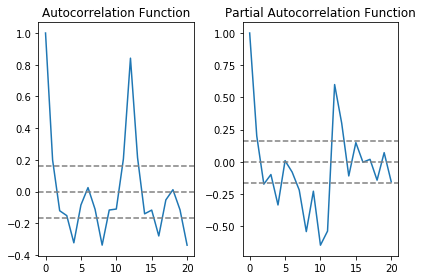

In [163]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(series_log_diff, nlags=20)
lag_pacf = pacf(series_log_diff, nlags=20, method='ols')

# Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(series_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(series_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(series_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(series_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
# The two dotted lines on either side of 0 are the confidence 
# intervals.These can be used to determine the
# 'p' and 'q' values as:

In [ ]:
# p: The first time where the PACF crosses the 
# upper confidence interval, here its close to 2. hence p = 2

In [ ]:
# q: The first time where the ACF crosses the upper confidence 
# interval, here its close to 2. Hence p=2.

In [164]:
# Now, using this we are going to create 3 different ARIMA models
# considering individual as well as combined effects. 
# We will also print RSS for each.
# RSS is for the values of residuals and not actual series.

### AR Model

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023 ')

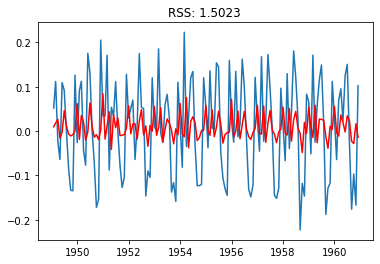

In [165]:
model = ARIMA(series_log, order=(2, 1,0))
results_AR = model.fit(disp=-1)
plt.plot(series_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f ' % 
          sum((results_AR.fittedvalues-series_log_diff)**2))

### MA Model

Text(0.5, 1.0, 'RSS: 1.4721')

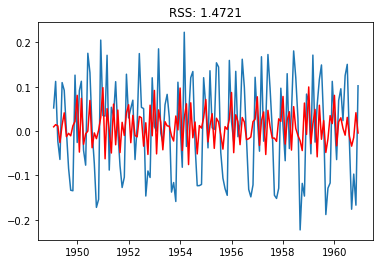

In [174]:
model = ARIMA(series_log, order=(0, 1, 2))
results_MA = model.fit(disp=-1)
plt.plot(series_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' %
          sum((results_MA.fittedvalues-series_log_diff)**2))

### ARIMA Model

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

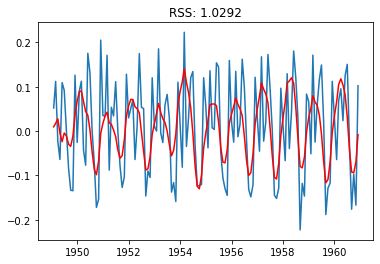

In [175]:
model = ARIMA(series_log, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(series_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' %
          sum((results_ARIMA.fittedvalues-series_log_diff)**2))

## Final step: Bringing this back to the original scale

### Steps Involved:

In [176]:
# First get the predicted values ans store it as series.
    # You will notice that the first month is missing because
    # we took a lag of 1(shift).
# Now convert differencing to log scale: find the cummulative
    # sum and add it to a new series with a base value (here 
    # the first-month value of the log-series).

In [177]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [178]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [179]:
predictions_ARIMA_log = pd.Series(series_log.ix[0], index=series_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
                ...   
1960-08-01    6.091052
1960-09-01    5.998702
1960-10-01    5.904689
1960-11-01    5.834765
1960-12-01    5.826638
Length: 144, dtype: float64

In [181]:
series_log.iloc[0]

4.718498871295094

In [182]:
# Next: Take the exponent of the series from above(anti-log) which will be 
    # the predicted value - the time series forecast model.
# Now plot the predicted values with the original.
# Find the RMSE

Text(0.5, 1.0, 'RMSE: 90.1045')

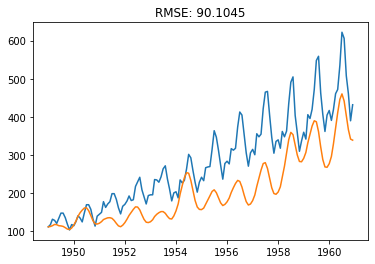

In [184]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(series)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f' % np.sqrt(sum((predictions_ARIMA-series)**2)/len(series)))